# MACHINE LEARNING CLASSIFICATION STAGE C TAG ALONG CODE

NAME: CHIAMAKA EGWUATU

ID: 16ce42cd4801f000

IMPORTING THE NECESSARY LIBRARIES

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [77]:
#Reading in the data
UCI= pd.read_csv('Data_for_UCI_named.csv')

In [78]:
UCI.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [79]:
UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [80]:
UCI.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [81]:
UCI.duplicated().sum()

0

In [82]:
UCI.shape

(10000, 14)

In [83]:
UCI.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

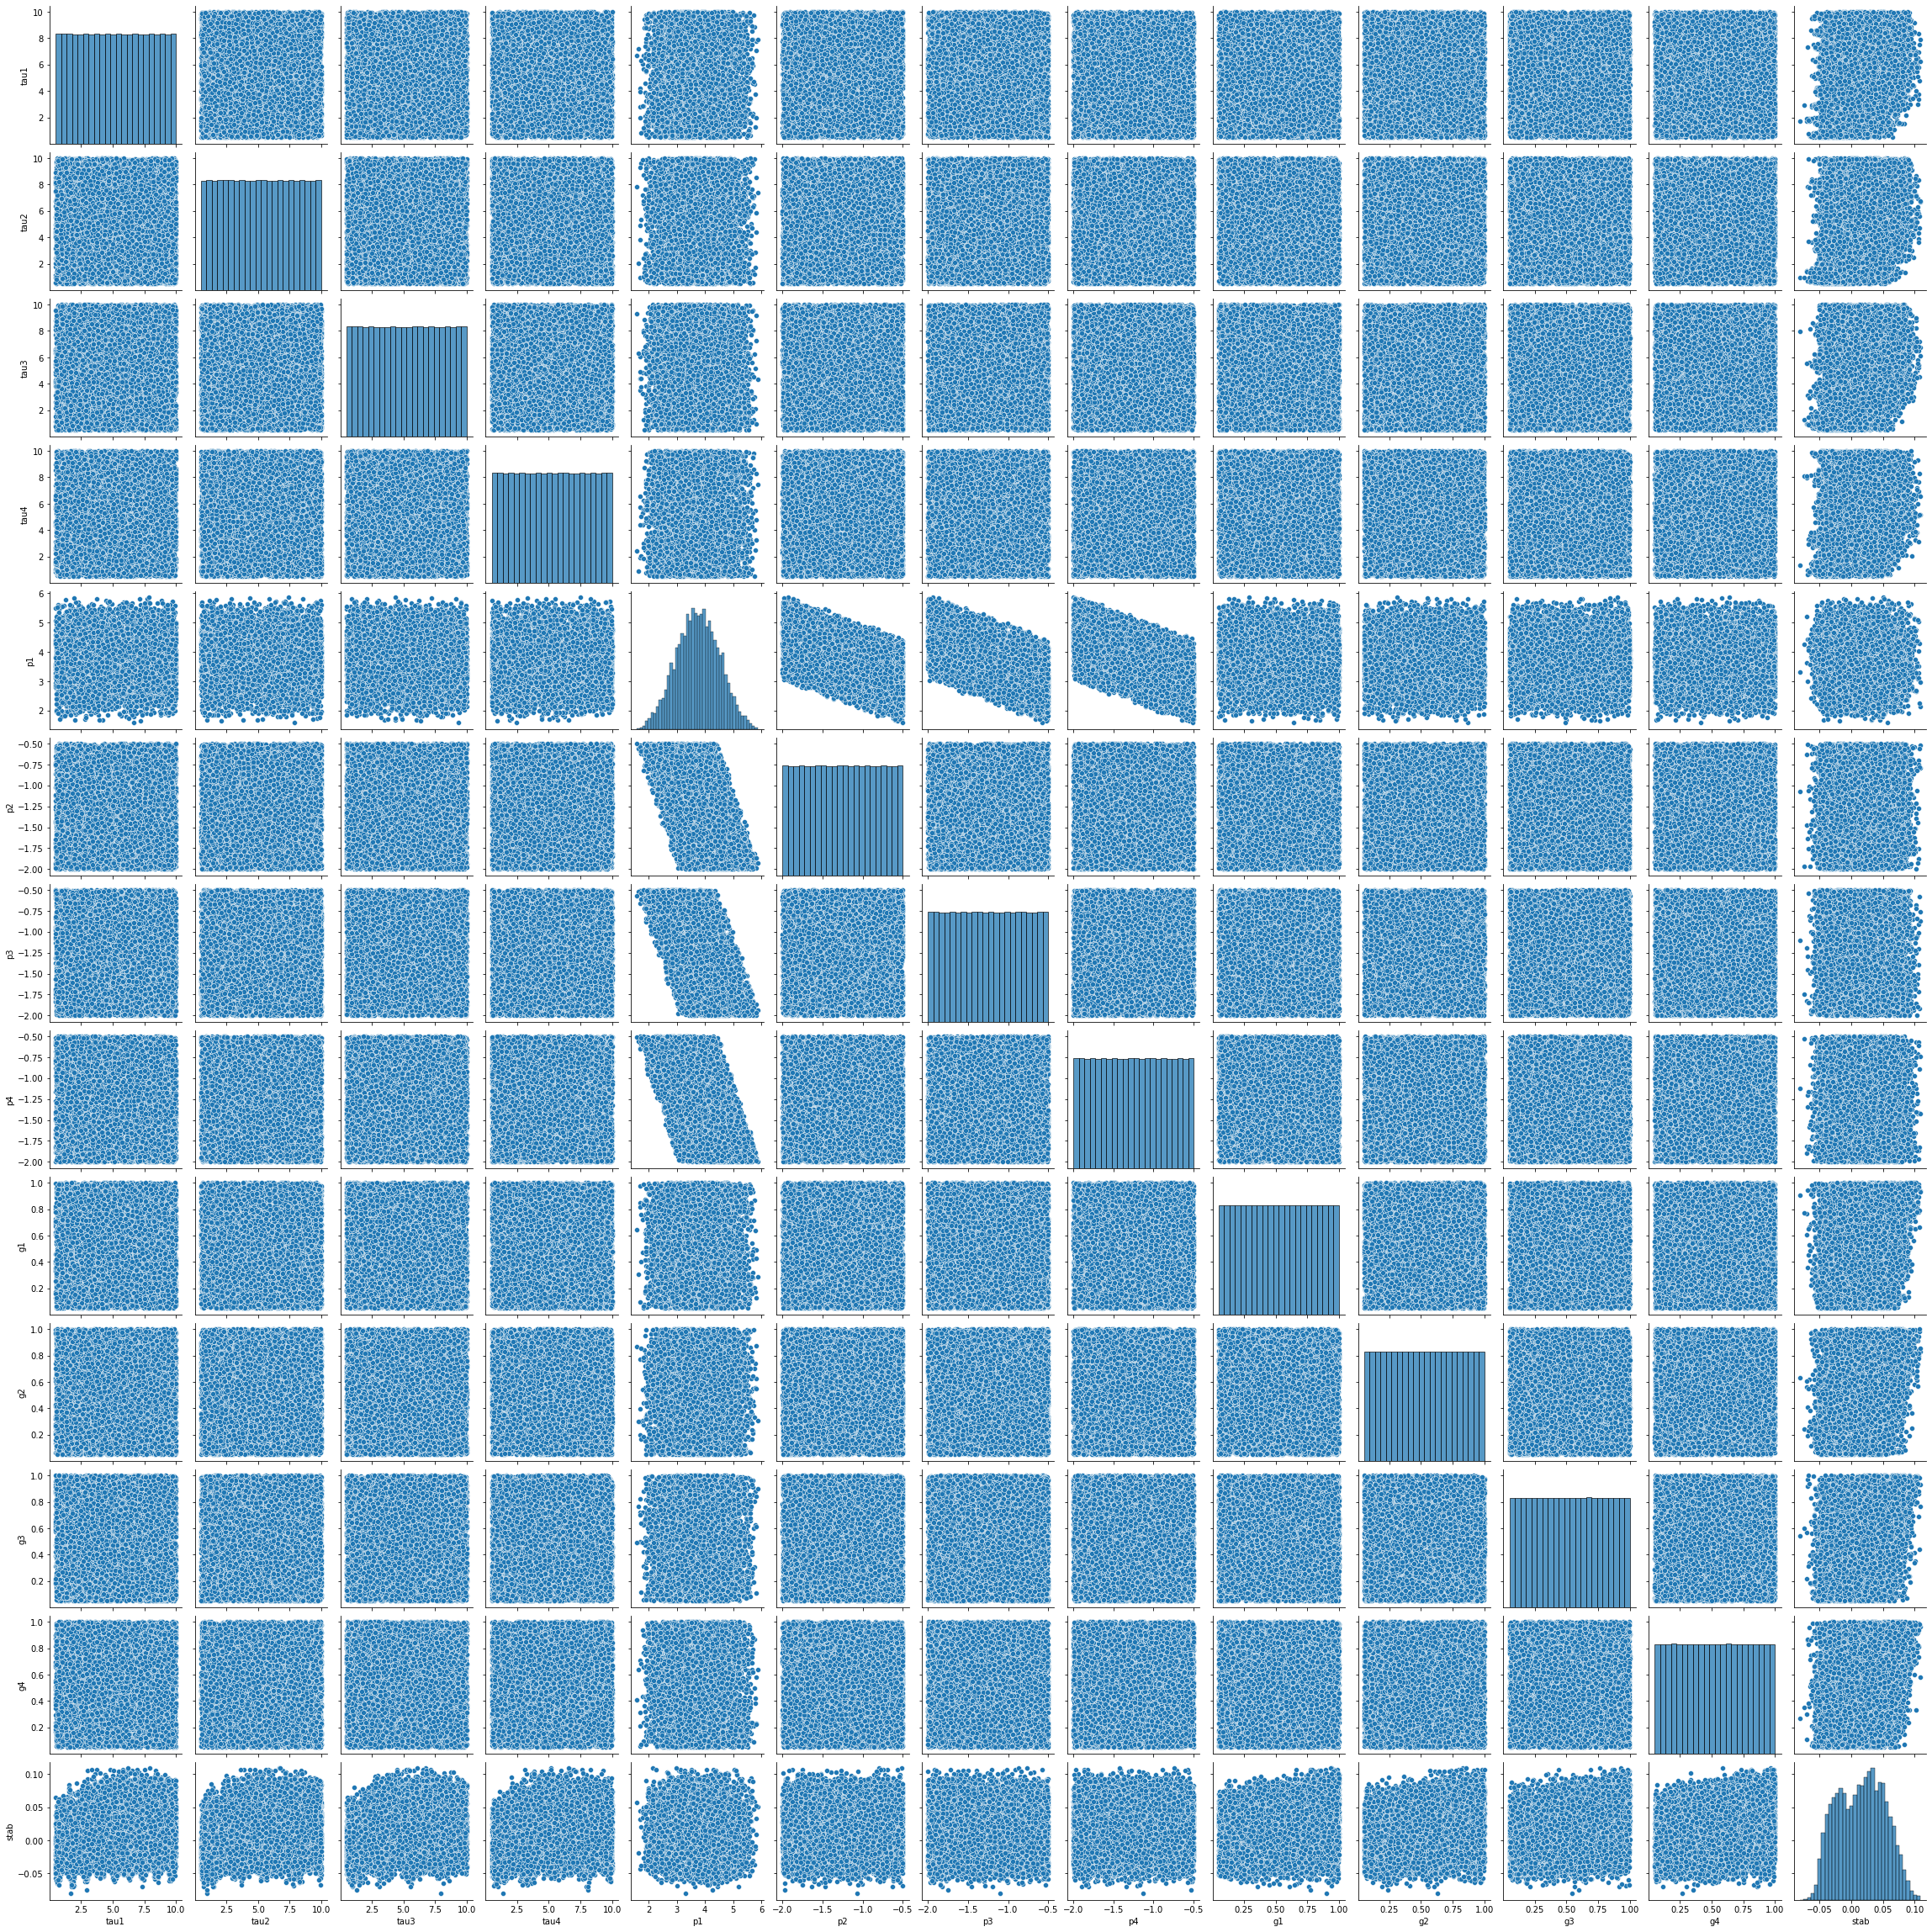

In [84]:
sns.pairplot(UCI)
plt.show()

In [85]:
X= UCI.drop(columns='stabf')
y= UCI['stabf']
scaler= StandardScaler()
X_normalized= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.835374 -0.791317  1.141704  1.652103  0.017397  1.079405 -0.017078   
1  1.478297 -0.126705 -0.803111 -1.415043  1.752124 -1.593619 -1.438158   
2  1.357093  1.312140 -0.803499 -1.471504 -0.458492  0.098253 -0.062840   
3 -1.653138  0.882289 -0.278354 -1.060901  0.284250  0.513904 -1.591046   
4 -0.771543  0.860108 -0.111670  1.680114 -0.298075  0.287450 -1.376343   

         p4        g1        g2        g3        g4      stab  
0 -1.092545  0.457467  1.220013  1.321628  1.579026  1.073120  
1 -0.011575 -0.406791  1.230354  0.135424  0.936256 -0.587487  
2  0.760963 -1.319852  0.881299  1.146596 -1.513802 -0.332095  
3  0.583414 -0.287304  1.647250  1.474543 -0.591750  0.355922  
4  1.606636  0.992226 -0.253610  0.481133  1.079063  0.924487

In [86]:
y.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [87]:
X_train, X_test, y_train, y_test =train_test_split(X_normalized,y,test_size =0.2, random_state =1)

QUESTION 14: RANDOM FOREST CLASSIFIER

In [88]:
RFC = RandomForestClassifier(random_state=1)
RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)

In [89]:
RFC_pred = RFC.predict(X_test)
Accuracy= accuracy_score(y_true=y_test, y_pred=RFC_pred)
print('Accuracy:{}'.format(round(Accuracy*100, 2)))

Accuracy:99.95


QUESTION 15: EXTREME GRADIENT BOOSTING (XGBOOST)

In [90]:
!pip install xgboost

In [91]:
import xgboost as xgb
from xgboost import XGBClassifier


In [92]:
X= UCI.drop(columns='stabf')
y= UCI['stabf']
scaler= StandardScaler()
X_normalized= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0 -0.835374 -0.791317  1.141704  1.652103  0.017397  1.079405 -0.017078   
1  1.478297 -0.126705 -0.803111 -1.415043  1.752124 -1.593619 -1.438158   
2  1.357093  1.312140 -0.803499 -1.471504 -0.458492  0.098253 -0.062840   
3 -1.653138  0.882289 -0.278354 -1.060901  0.284250  0.513904 -1.591046   
4 -0.771543  0.860108 -0.111670  1.680114 -0.298075  0.287450 -1.376343   

         p4        g1        g2        g3        g4      stab  
0 -1.092545  0.457467  1.220013  1.321628  1.579026  1.073120  
1 -0.011575 -0.406791  1.230354  0.135424  0.936256 -0.587487  
2  0.760963 -1.319852  0.881299  1.146596 -1.513802 -0.332095  
3  0.583414 -0.287304  1.647250  1.474543 -0.591750  0.355922  
4  1.606636  0.992226 -0.253610  0.481133  1.079063  0.924487

In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
UCI['stabf'] = labelencoder.fit_transform(y)
UCI['stabf'].unique()

array([1, 0])

In [94]:
UCI.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347      1  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957      0  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471      1  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871      1  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860      1

In [98]:
xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(X_train.values, y_train.values)
xgb_pred = xgb_clf.predict(y_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['stable' 'unstable']

In [ ]:
xgb_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=xgb_pred)
print('Accuracy:{}'.format(round(Accuracy*100, 2)))

QUESTION 16: LIGHT GBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(random_state=1)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [ ]:
lgbm_pred = lgbm_clf.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm_pred)
print('Accuracy:{}'.format(round(Accuracy*100, 2)))

QUESTION 17: 

In [100]:
from sklearn.ensemble import ExtraTreesClassifier

In [101]:
extra_tree_clf = ExtraTreesClassifier( )
extra_tree_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [104]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=1)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
ExtraTreesClassifier(random_state=1)
clf.predict([[0, 0, 0, 0]])

array([1])